<div style="background-color:#057BA3; padding:6px; color:#ffffff;">

## IUCAA Finesse Workshop 18-22nd Dec 2019 (Solved using Finesse 3)
</div>

Before starting, run the cell below to import the required dependencies for the examples in this notebook:

In [ ]:
import numpy as np                         # For numbers, arrays, matrices
import matplotlib                          # For plotting
import matplotlib.pyplot as plt

# Modulation and beats

This notebook is all about modulation and beats. These are fundamental concepts required for understanding how signals arise in cavities and how cavities can be controlled. This first notebook briefly visits the theory and has some examples for you to try, and the next notebook has some exercises for you to try with Finesse.

The derivations are based on those from the <a ref="https://doi.org/10.1007/s41114-016-0002-8">Interferometer techniques for gravitational-wave detection</a> review article. Please refer to that article, particularly sections 3 and 4, for further background on the concepts covered here.

![Amplitude modulation](assets/amplitude-modulation.svg)

## Cavity control recap

Here is a short reminder of some important points of Fabry-Perot cavities from the introduction:

 - We use cavities to sense gravitational waves.
 - Cavities give the greatest gain-bandwidth when on resonance, so we (usually) want to keep them there.
 - Resonance is achieved in a cavity when its round-trip length is an exact integer multiple of the laser wavelength.
 - In practice, cavity mirrors are always moving due to unwanted noise like seismic motion. Is is therefore important to control them by applying corrective feedback signals, e.g. via coil/magnet actuators.

**i.e. we need a way to control our cavity length (or input laser frequency) so that the cavity stays on resonance.** We can correct the length of the cavity by applying a force to one or more of the cavity mirrors, using e.g. a coil/magnet actuator with the magnet on the mirror and the coil on some fixed housing. We can correct the frequency of the input laser by applying a deformation (either using mechanical force or temperature) to the laser crystal.

This is a cartoon depicting a voice coil actuator:

![Voice coil](assets/voice-coil.svg)

### How can we control cavities?

You might think the simplest idea would be to just compare the power transmitted (or reflected) from the cavity to the theoretical power, then move the mirror until it is maximised, since the power is maximal when the cavity is on resonance. The problem with this signal is that it contains no *directional* information that can be passed to an actuator; we have no way of knowing with *which sign* we should apply feedback. **We need some way to sense the derivative of the DC power so we can figure out the sign of the feedback to apply.**

One solution is to *modulate* the input field (the main laser input - sometimes called the *carrier*), producing <a href=https://en.wikipedia.org/wiki/Sideband>sidebands</a> which interact with the cavity differently to the main laser light. The *beat signal* produced between these sidebands and the carrier, after interacting with the cavity, depends on the resonant condition in the cavity for all of the fields involved.

The 'standard' method for controlling a two mirror cavity is the <a href=https://en.wikipedia.org/wiki/Pound–Drever–Hall_technique>Pound-Drever-Hall (PDH)</a> technique. In this case, the input beam is *phase* modulated to produce a pair of sidebands which do not resonate in the cavity, so are just directly reflected. A photodetector on reflection then measures the beat signal, which is then *demodulated* and filtered to produce an antisymmetric, bipolar error signal that is linear over the bandwidth of the cavity. We'll cover PDH locking in more detail later but for now we should understand modulation.

## Modulation

Modulation is the process of varying one or more properties of a waveform. Modulation can be produced intentionally in a number of ways, e.g.:

 - By reflecting light from a moving mirror
 - By using an *electro-optic modulator*

We can also get unintentional modulation due to noise coupling into the light within the cavity, such as from seismic motion. We will see later that it's useful to intentionally add modulation for the purposes of control.

## Types of modulation

Modulation of electromagnetic waves comes in three flavours:

 - Amplitude modulation
 - Phase modulation
 - Frequency modulation

<div style="background-color:#cceffc;padding:10px;">
    
### Question: Examples

Can you think of an everyday item or system which uses each of these principles?

</div>

## Amplitude modulation

Amplitude modulation is used to encode information as a time dependent amplitude of a carrier wave. The technique is most famously known for being used for radio broadcasting.

In amplitude modulation, a signal is encoded in the amplitude of a carrier field. Suppose we have a carrier field:

$$E_c(t) = E_0\cos\big(2\pi f_\mathrm{c} t + \varphi_c \big)$$

Here, $E_0$ is the initial field amplitude, $f_c$ is our carrier frequency (the laser's frequency, i.e. $\frac{c_0}{\lambda_0}$), $t$ is time and $\phi_c$ is an arbitrary phase offset.

Furthermore, suppose that we have a sinusoidal signal that we amplitude modulate onto the carrier field:

$$x(t) = m\sin(2\pi f_\mathrm{m} t + \varphi_\mathrm{m}),$$

The modulated field is then described by

$$\begin{align}
E(t) = E_0\cos \big( 2\pi f_\mathrm{c} t + \varphi_c \big) \big( 1 + m\sin(2\pi f_\mathrm{m} t + \varphi_\mathrm{m}) \big).
\end{align}$$

Here, the modulation frequency $f_m$ determines how quickly the amplitude changes, the modulation index $m$ determines how large the amplitude fluctuations are, and the modulation phase $\phi_m$ is a constant phase term of the signal.

For amplitude modulation, the modulation index must be between 0 and 1, where 1 corresponds to the instantaneous amplitude reaching down to zero at the minimum.

<div style="background-color:#cceffc;padding:10px;">
    
### Question: energy conservation

Does the amplitude modulation described by the above equation add energy to the field?

</div>

Amplitude modulation does not add energy to the signal, the net energy of the signal remains same before and after modulation.

### Visualising amplitude modulation

We can see an example of amplitude modulation below, where the figure is generated by using a carrier frequency $f_c = 20 \text{Hz}$, a modulation frequency $f_m = 2 \text{Hz}$, and a modulation index $m = 0.9$. Normally $f_m \ll f_c$, but for visualisation purposes we exaggerate the modulation frequency. Both the overall phase term $\phi_c$ and the modulation phase term $\phi_m$ are set to zero.

Run the cell below to produce the plot:

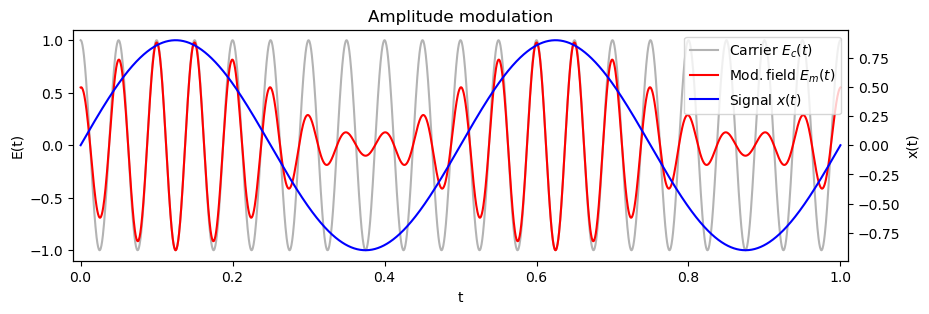

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
## Code for showing an amplitude modulated field ##

# Parameters
# --------------------------------------------------
t = np.linspace(0,1,2048)   # Time array
E0 = 1                      # Amplitude of the field.
fc = 20                     # Carrier freq
phi_c = 0                   # Phase of the field
fm = 2                      # Amplitude modulation freq
m = 0.9                     # Modulation index [0,1]
phi_m = 0                   # Modulation phase

# Computing the fields and signal arrays
# --------------------------------------------------
# Carrier field
E = E0*np.cos(fc*2*np.pi*t + phi_c)
# Signal 
x = m*np.sin(fm*2*np.pi*t + phi_m)
# Phase modulated field
E_m = E0*np.cos(fc*2*np.pi*t + phi_c)*(1 - (m/2)*(1-np.sin(fm*2*np.pi*t+phi_m) ))

# Plotting
# --------------------------------------------------
fig = plt.figure(figsize=(10,3))

# Axis for carrier and modulated field
ax = plt.subplot(1,1,1)
p1 = ax.plot(t,E,'0.7', label='$\mathrm{Carrier}\ E_c(t)$')
p2 = ax.plot(t,E_m,'r',label='$\mathrm{Mod. field}\ E_m(t)$')
ax.set_xlabel('t')
ax.set_ylabel('E(t)')
ax.set_title('Amplitude modulation')
ax.set_xlim(-0.01,1.01)

# Second y-axis for signal
ax2 = ax.twinx()
p3 = ax2.plot(t,x,'b', label='$\mathrm{Signal}\ x(t)$')
ax2.set_ylabel('x(t)')

# The legend
plots = p1+p2+p3
labs = [lab.get_label() for lab in plots]
ax.legend(plots, labs, loc=1, fontsize=10)

# Showing figure
plt.show(fig)

<div style="background-color:#cceffc;padding:10px;">
    
### Task: Varying parameters

Try changing the parameters of the above modulation ($E_0$, $f_c$, $\phi_c$, $f_m$, $m$ and $\phi_m$) to get a feel for what is important.

</div>

### Amplitude modulation in the sideband picture

Using complex notation, an amplitude modulated field at an arbitrary fixed point in space can be described by

$$\begin{align}
E_\mathrm{m}(t) = E_0\exp \Big(i\big( 2\pi f_\mathrm{c} t \big) \Big)\Big( 1 - \frac{m}{2}\big(1 - \sin(2\pi f_\mathrm{m} t + \varphi_\mathrm{m}) \big) \Big) ,
\end{align}$$

where the constant phase term of the carrier $\phi_c$ has been absorbed into the now complex amplitude $E_0$. By using the Euler identity $\sin(\phi) = \big( \mathrm{e}^{i\phi}-\mathrm{e}^{-i\phi}\big) /2i$, we can write this as

$$\begin{align}
E_\mathrm{m}(t) =& E_0\mathrm{e}^{2\pi i f_\mathrm{c} t}
\bigg[ 1 - \frac{m}{2} - \frac{im}{4}
\Big( \mathrm{e}^{i ( 2\pi f_\mathrm{m} t + \varphi_\mathrm{m} )} -
\mathrm{e}^{-i ( 2\pi f_\mathrm{m} t + \varphi_\mathrm{m})}
\Big)
\bigg] \\
=& a_0 \mathrm{e}^{2\pi i f_c t} + a_- \mathrm{e}^{2\pi i f_- t} + a_+ \mathrm{e}^{2\pi i f_+ t} ,
\end{align}$$

where $f\pm = f_c \pm f_m$. So for amplitude modulation, we always get exactly one pair of sidebands, as seen in the figure below.

![Amplitude modulation sidebands](assets/amplitude-modulation-sidebands.svg)

## Phase modulation

Phase modulation encodes information as a time dependent phase factor of a carrier wave. The phase modulation can be added on purpose to transmit information, which is utilised in a wide range of radio wave based technologies, such as satellite TV, in the mobile phone grid and WiFi.

In phase modulation, a signal is encoded in the phase of a carrier field. Suppose we have a carrier field $E_c \left( t \right) = E_0 \cos \left( 2 \pi f_c t + \phi_c \right)$, where $E_0$ is the amplitude, $f_c$ is the frequency and $\phi_c$ is a phase term. Furthermore, suppose that the signal that is phase modulated onto the carrier field is $x\left( t \right) = m \sin \left( 2 \pi f_m t + \phi_m \right)$, then the modulated field is described by

$$\begin{align}
E(t) =& E_0\cos \big[ 2\pi f_\mathrm{c} t + \phi_c + x(t) \big] \\
=& E_0\cos \big[ 2\pi f_\mathrm{c} t + \phi_c + m\sin(2\pi f_\mathrm{m} t + \phi_\mathrm{m}) \big] .
\end{align}$$

The *modulation frequency* $f_m$ determines how quickly the phase changes, the *modulation index* (sometimes called the *modulation depth*) $m$ determines the amplitude of the phase oscillations, and the *modulation phase* $\phi_m$ is a constant phase term of the signal.

When the modulation index is low, as usually the case in gravitational wave interferometers, the phase modulation can be described alternatively by

$$
E=E_0~\exp {\left( \mathrm {i}\,2 \pi f_c \,t\right) }~\left( 1-\frac{m^2}{4}+\mathrm {i}\,\frac{m}{2}\Bigl (\exp {\left( -\mathrm {i}\,2 \pi f_m \,t\right) }+\exp {\left( \mathrm {i}\,2 \pi f_m \,t\right) }\Bigr )\right),
$$

which shows only the first sideband pair at $\pm f_m$. To calculate the sidebands to higher orders, one can employ the following equation:

$$
E=E_0~\exp {\left( \mathrm {i}\,2 \pi f_c \,t\right) }~\sum _{k=-order}^{order}i^{\,k}~J_k(m)~\exp {\left( \mathrm {i}\,k 2 \pi f_m \,t\right) },
$$

where $J_k(m)$ is a Bessel function of the first kind.

### Frequency modulation

Frequency modulation instead encodes the information in the frequency of the field. Frequency modulation is commonly used for broadcasting radio, but it is used in a wide range of other technology as well.

Recall that the frequency $f$ of a field $E \left( t \right) = \sin \left( \phi \left( t \right) \right)$ is defined as $2 \pi f = \frac{d \phi \left( t \right)}{dt}.$

Thus, to encode the signal in the frequency, asuming we have the same carrier and signal as we used above for phase modulation, we need to satisfy

$$\begin{align}
2\pi f =& 2\pi f_c + m\sin(2\pi f_\mathrm{m}t + \varphi_\mathrm{m}) = \frac{\mathrm{d} \phi(t) }{\mathrm{d} t}.
\end{align}$$

The solution is $\phi \left( t \right) = 2 \pi f_c t − m 2 \pi f_m \cos \left( 2 \pi f_m t + \phi_m \right) + \phi_c,$

which gives the frequency modulated field

$$\begin{align}
E(t) = E_0\cos\big[ 2 \pi f_c t + \varphi_c - \frac{m}{2\pi f_\mathrm{m}} \cos(2\pi f_\mathrm{m} t + \varphi_\mathrm{m} ) \big].
\end{align}$$

### Aside: frequency modulation is mathematically the same as phase modulation

If we define $m' = \frac{m}{2\pi f_\mathrm{m}}$ and $\varphi'_\mathrm{m} = \varphi_\mathrm{m} + \frac{3\pi}{2}$ and insert these into the expression above, we end up with

$$\begin{align}
E(t) = E_0\cos\big[ 2 \pi f_c t + \varphi_c + m'\sin(2\pi f_\mathrm{m} t + \varphi'_\mathrm{m} ) \big],
\end{align}$$

which is identical to the expression we had for phase modulation. The difference between phase modulation and frequency modulation lays in how they are technically created, and that a modulation index for phase modulation is normally smaller than 10, while usually above 10 000 for frequency modulation.

### Visualising phase modulation

An example of phase modulation is below, where the figure is generated by using a carrier frequency $f_c = 20 \text{Hz}$, a modulation frequency $f_m = 2 \text{Hz}$, and a modulation index $m = 5$. Normally $f_m \ll f_c$, and $m \ll 1$, but for visualising purposes we exaggerate both the modulation frequency and the modulation index in this example. Both the overall phase term $\phi_c$ and the modulation phase term $\phi_m$ are set to zero.

Run the cell below to produce the plot:

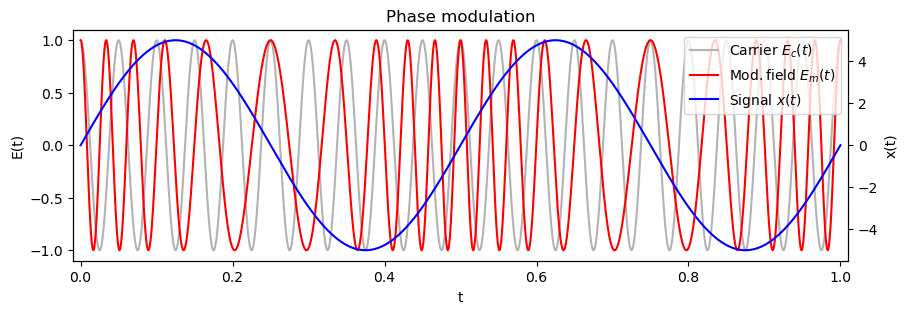

In [6]:
## Code for showing a phase modulated field ##

# Parameters
# --------------------------------------------------
t = np.linspace(0,1,2048)   # Time array
E0 = 1                      # Amplitude of the field.
fc = 20                     # Carrier freq
phi_c = 0                   # Phase of the field
fm = 2                      # Phase modulation freq
m = 5                       # Modulation index
phi_m = 0                   # Modulation phase

# Computing the fields and signal arrays
# --------------------------------------------------
# Carrier field
E = E0*np.cos(fc*2*np.pi*t + phi_c)
# Signal 
x = m*np.sin(fm*2*np.pi*t + phi_m)
# Phase modulated field
E_m = E0*np.cos(fc*2*np.pi*t + phi_c + m*np.sin(fm*2*np.pi*t+phi_m))

# Plotting
# --------------------------------------------------
fig = plt.figure(figsize=(10,3))

# Axis for carrier and modulated field
ax = plt.subplot(1,1,1)
p1 = ax.plot(t,E,'0.7', label='$\mathrm{Carrier}\ E_c(t)$')
p2 = ax.plot(t,E_m,'r',label='$\mathrm{Mod. field}\ E_m(t)$')
ax.set_xlabel('t')
ax.set_ylabel('E(t)')
ax.set_title('Phase modulation')
ax.set_xlim(-0.01,1.01)

# Second y-axis for signal
ax2 = ax.twinx()
p3 = ax2.plot(t,x,'b', label='$\mathrm{Signal}\ x(t)$')
ax2.set_ylabel('x(t)')

# The legend
plots = p1+p2+p3
labs = [lab.get_label() for lab in plots]
ax.legend(plots, labs, loc=1, fontsize=10)

# Showing figure
plt.show(fig)

In the figure above we can clearly see that (i) the phase of the modulated field oscillated around the original field, and (ii) that the amplitude is kept constant. These are two important characteristics of a purely phase modulated field.

<div style="background-color:#cceffc;padding:10px;">
    
### Task: Varying parameters

Try changing the parameters of the above modulation ($E_0$, $f_c$, $\phi_c$, $f_m$, $m$ and $\phi_m$) to get a feel for what is important.

</div>

### Phase modulation in the sideband picture

Using complex notation, a phase modulated electric field at an arbitrary fixed point in space can be described by 

$$E_\mathrm{m}(t) = E_0\exp \Big(i\big( 2\pi f_\mathrm{c} t + m\cos(2\pi f_\mathrm{m} t + \varphi_\mathrm{m})\big) \Big),$$

where the overall phase $\phi_c$ has been included in the now complex amplitude $E_0$. The tricky factor $\exp(i m \cos(2\pi f_m t + \phi_m))$ can be Taylor expanded around $m=0$. For small modulation indices ($m\ll1$), we can approximate the series well with only the first order terms of the Taylor series:

$$\begin{align}
E_\mathrm{m}(t) &= E_0\exp \Big(i\big( 2\pi f_\mathrm{c} t + m\cos(2\pi f_\mathrm{m} t + \varphi_\mathrm{m})\big) \Big) \\
&\approx E_0\exp \big( 2\pi i f_\mathrm{c} t\big) \bigg[ 1 + \frac{i m}{2}\Big( \exp\big( -i(2\pi f_\mathrm{m} t + \varphi_\mathrm{m})\big) + \exp\big( i( 2\pi f_\mathrm{m} t + \varphi_\mathrm{m})\big) \Big) \bigg] \\
&= a_0 \mathrm{e}^{2\pi i f_c t} + a_- \mathrm{e}^{2\pi i f_- t} + a_+ \mathrm{e}^{2\pi i f_+ t} ,
\end{align}$$

where $f\pm = f_c \pm f_m.$

Thus, the effect of a weak phase modulation (small $m$) is two new frequency components, one on each side of the carrier. We call these **sidebands** of the carrier. The stronger the phase modulation, the more sideband pairs are needed to be taken into account. That is, we would need to add frequency components of $f_c \pm 2 f_m$, $f_c \pm 3 f_m$, $f_c \pm 4 f_m$ and so on, as the modulation index $m$ increases.

The figure below shows how a phase modulated field can be represented in the frequency domain.

![Phase modulation sidebands](assets/phase-modulation-sidebands.svg)

For phase modulation the modulation index is usually small, and in gravitational wave interferometers usually well below 1, which means only a few sideband pairs are needed to be taken into account. However, to represent frequency modulation in the sideband picture, a long series of sideband pairs would usually be needed.

<div style="background-color:#cceffc;padding:10px;">
    
### Question: phase modulation sidebands

When you phase modulate a light field, how many sidebands do you create? In contrast, how many do you get with amplitude modulation? What influences the amplitude of the sidebands?

</div>

Phase modulation gives rise to infinite number of sidebands, whereas amplitude modulation gives rise to exactly two sidebands. The modulation depth influences the amplitude of the sidebands.

## Changes made to reflected light caused by mirror motion

What happens to the reflected light field from a moving mirror?

![Mirror phase modulation](assets/mirror-phase-modulation.png)

Let's assume sinusoidal mirror motion with frequency $f$:

$$\Delta x = m \cos( 2 \pi f t )$$

Assuming the mirror has (amplitude) reflectivity $r$, then then the reflected field $a_2$ becomes:

$$\begin{align}
a_2 &= a_1 r \exp( -i 2 k (x + \Delta x)) \\
    &= a_1 r \exp( -i 2 k (x + m \cos( 2 \pi f t )))
\end{align}$$

where $k = \frac{2 \pi}{\lambda_0}$ is the wave number and $x$ is some arbitrary distance between the mirror and the laser.

If we define our origin to be at $x = 0$, this equation simplifies to

$$
a_2 = a_1 r \exp( -2i k m \cos( 2 \pi f t ))
$$

This contains two terms that are varying sinusoidally:

1. $\exp( -2i k ... )$
2. $m \cos( 2 \pi f t )$

The first term is the light field itself, which varies at a frequency $f_0 = \frac{c_0}{\lambda_0} \approx 280 \text{THz}$.

The second term varies at $f$, i.e. the frequency of the mirror's motion. It modulates the imaginary part of the field. This is called **phase modulation**. Note that we assume here that the motion is small (as in the case of suspended optics like in LIGO) and therefore does not affect the *magnitude* of the reflected field, e.g. through misalignment of the light.

**We call the sidebands added to the light field by mirror motion *signal* sidebands.**

## Fabry-Perot cavities are phase transducers

For small displacements of Fabry-Perot cavity mirrors, at least for the kind of displacement we would expect a gravitational wave to impart\*, the reflected light from the cavity is **phase modulated**. In order to obtain a real signal from the interferometer, we therefore need a way to convert this phase modulation into an amplitude modulation. We will see later how to do this, but first it requires us to understand optical beats.

\**Gravitational waves do not actually displace the cavity optics - they change the space between the optics - but for the purposes of understanding interferometers it's usually fine to picture gravitational waves as moving the mirrors. <a href="https://aapt.scitation.org/doi/abs/10.1119/1.18578">This paper</a> provides background on this concept.*

## Optical beats

*Beat* signals appear when an optical field contains two or more frequency components. This is an important effect since it provides us with a way to convert phase modulation, which we **cannot** detect with photodetectors, into amplitude modulation, which we **can** (well, the square of the amplitude).

Lets look at the simplest case of just two frequency components: at some arbitrary point in space we have an optical field given by

$$
\begin{align}
E(t) = a_c \mathrm{e}^{i\omega_c t} + a_1 \mathrm{e}^{i\omega_1 t}.
\end{align}
$$

where subscript $c$ stands for the carrier and subscript $1$ indicates a sideband.

Photodiodes can only resolve power fluctuations up to around 100 MHz, thus what we will measure is the power averaged over some period of time. The power averaged over the period time of the carrier is given by

$$
\begin{align}
\bar{P}(t)= \big|E(t)\big|^2 &= \big|a_c\big|^2 + \big|a_1\big|^2 + a_c a_1^* \mathrm{e}^{-i\omega_s t} + a_c^* a_1 \mathrm{e}^{i\omega_s t} \\
&= \big|a_c\big|^2 + \big|a_1\big|^2 + 2\mathfrak {R} \left\{ a_c^* a_1 \mathrm{e}^{i\omega_s t} \right\}.
\end{align}
$$

We end up with a **DC part**, i.e. a part without a time/frequency dependence, and an **AC part** of frequency $\omega_s = | \omega_c − \omega_1 |$. The two frequency components "beat" against each other to create this **beat signal**. Usually, it is the amplitude, frequency, and phase of the sideband that we are interested in extracting. However, the sideband amplitude is normally tiny compared to the carrier amplitude, so in the DC part it is hard to detect its magnitude. However, the time dependent term is proportional to the sideband amplitude, so if we demodulate and low pass filter the signal we could extract this information.

### Visualising optical beats

In the example below we look at a laser field containing two frequency components, and how the power of this field looks like.

Run the cell below to produce the plot:

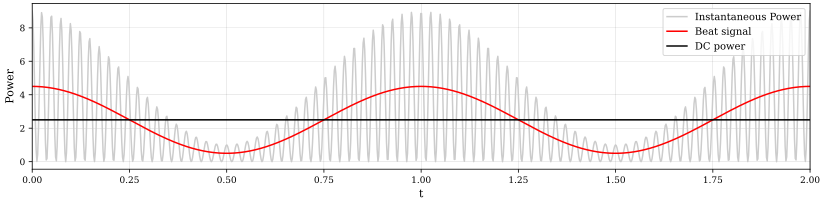

In [86]:
import numpy as np
import matplotlib.pyplot as plt 
## Code for showing an optical beat ##

# Parameters
# -------------------------------------
# Time array [s]
t = np.linspace(0,2,1000)
# Frequencies [Hz]
f1 = 20
f2 = 21
# Phases
phi1 = 0
phi2 = 0
# Amplitudes
a1 = 2
a2 = 1

# Computing the fields
# -------------------------------------
# The two fields
E1 = a1*np.cos(2*np.pi*f1*t + phi1)
E2 = a2*np.cos(2*np.pi*f2*t + phi2)
# The total field
E = E1+E2
# The total power at the photo diode
P = E**2
# The optical beat signal
beat = a1*a2*np.cos((f2-f1)*2*np.pi*t)
# DC power
dc = (a1**2 + a2**2)/2

# Plotting
# -------------------------------------
fig = plt.figure(figsize=(14, 3))
ax = plt.gca()
ax.plot(t,P,'0.8',label='Instantaneous Power')
ax.plot(t,dc+beat,'r', label='Beat signal')
ax.plot([t[0],t[-1]],[dc,dc],'k',label='DC power')
ax.set_xlabel('t')
ax.set_ylabel('Power')
ax.legend(loc=1, fontsize=10)
plt.show(fig)

<div style="background-color:#cceffc;padding:10px;">
    
### Task: Optical beats

Try changing the parameters of the two signals. What happens to the beat signal amplitude when:
 - The frequencies are very different?
 - The frequencies are the same?
 - The phases are different?
 - The amplitudes are different?

</div>

1. The frequency of beat signal will be high and its amplitude will be $DC+a_{1}a_{2}$.<br>
2. The beat signal will be constant and equal to the $DC$.<br>
3. The beat signal amplitude is unaffected as it depends only on the individual amplitudes and the frequencies.<br>
4. The beat signal amplitude increases as we increase the amplitudes of individual signals.

<div style="background-color:#057BA3; padding:6px; color:#ffffff;">

## IUCAA Finesse Workshop 18-22nd Dec 2019
</div>


# Modulation

These tasks are designed to introduce you working with multiple frequency components in Finesse. Later we'll look at how these can be used to create control signals for interferometers.

This session is based on the GWoptics.org <a href=http://www.gwoptics.org/learn/index.html>Learn Laser Interferometry</a> course, with some extensions and adaptations.

## Goal of the session

**Finesse/Pykat things you will learn**:
 - The `mod` and `ad` components

## Getting Started

As usual, we start by loading PyKat and the other Python packages we will need:

(type shift+enter to run)

In [ ]:
from pykat import finesse        # import the whole pykat.finesse package
from pykat.commands import *     # import all packages in pykat.commands
import numpy as np               # for basic math/sci/array functions
import matplotlib.pyplot as plt  # for plotting

# tell the notebook to automatically show plots inline below each cell
%matplotlib inline               
# use pykat's plotting style. change dpi to change plot sizes on your screen
pykat.init_pykat_plotting(dpi=90)

## Frequencies in Finesse

Finesse is a frequency domain simulation tool. Each component of the optical field is perfect delta function at the specified frequency, and only frequencies that are explicitly defined are included in the calculation. Finesse defines *three* categories of frequency component:
 * the **carrier** -- the main optical field, supplied by the laser;
 * **sidebands** -- generated by modulating the field, usually using a modulator component; and 
 * **signals** -- which are also generated by modulating the field, but are assumed to be small enough that they couple negligible power from the carrier. 
 
The carrier frequency in Finesse is $c_0/1064{\rm nm}$ unless the user specifies a frequency offset in the `laser` component, or overwrites the default wavelength in their `kat.ini` file or using the `lambda` command. 

Sidebands are usually radio-frequency (RF) modulations applied to the carrier so that the <a href="">beat signal</a> generated between the sidebands and the carrier can be used to measure a behaviour in the optical system and control it. Signals are typically injected to calculate responses. You will learn more about signals later.


## Tasks

In this example we use a laser and an *Electro-Optic Modulator* (EOM, keyword `mod`) to show how the amplitude of the carrier and the sidebands varies with the modulation index $m$.  We use *amplitude detectors* (keyword `ad`) to look at the amplitude of the frequency components. Unfortunately amplitude detectors do not exist in reality, but a nice property of numerical models is that we can make impossible "measurements" and find out more about the system. (You've previously seen an example of this when using a `pd` component inside a cavity without affecting the measured field).

<div style="background-color:#cceffc;padding:10px;">

### Task 1: Adding sidebands to a laser

Write Finesse code to model a laser outputting 1W of power that is incident on a *modulator* 1m away. Make two versions of the simulation, using 
 * an amplitude modulator
 * a phase modulator
 
each with a single pair of sidebands with frequency 1kHz and modulation depth 0.3.

</div>

You may find it helpful to check the <a href="http://www.gwoptics.org/finesse/reference/">Syntax Reference</a>

<div style="background-color:#cceffc;padding:10px;">

### Task 2: Power Conservation

1. Add the following detectors to measure the output of the modulator for both simulations:
     * a `pd` to measure the total DC power in the transmitted field
     * several `ad`s, to measure the amplitude of each frequency component
   The full optical configuration should look like this:
   <img src="http://www.gwoptics.org/learn/02_Plane_waves/03_Optical_modulation/phase_modulation.svg" width=40%>


2. Plot the outputs for all the *amplitude* detectors as the modulation depth is varied from 0 to 1


3. Use appropriate mathematical operations (with Python) to reconstruct the total power in the field from the outputs of the `ad` detectors. Does this match the power measured by the `pd`?

   **Hint:** The units of the `ad` detector are $\sqrt(W)$ - see <a href="https://link.springer.com/article/10.1007/s41114-016-0002-8#Sec27">section 4 of the Liiving Review</a>. By default, Finesse will output the absolute value of each detector (i.e. `yaxis abs`). 
   
   
4. Can you explain why the plots produced in (2) and (3) look this way? Does this make physical sense? What happens when additional pairs of sidebands are added to the phase modulator? You may wish to plot the phase modulator simulation over a larger range of modulation depths.

</div>



C:\Users\91938\anaconda3\envs\finesse\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


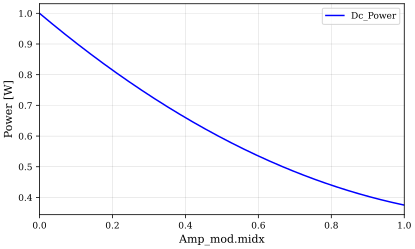

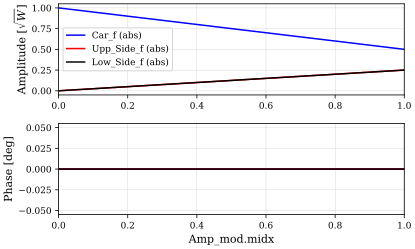

Total Power for midx= 0.0 : 1.0000000000000004
Total Power for midx= 0.005 : 0.9950093750000003
Total Power for midx= 0.01 : 0.9900375000000002
Total Power for midx= 0.015 : 0.9850843750000003
Total Power for midx= 0.02 : 0.9801500000000002
Total Power for midx= 0.025 : 0.9752343750000003
Total Power for midx= 0.03 : 0.9703375000000002
Total Power for midx= 0.035 : 0.9654593750000002
Total Power for midx= 0.04 : 0.9606000000000001
Total Power for midx= 0.045 : 0.9557593750000003
Total Power for midx= 0.05 : 0.9509375000000004
Total Power for midx= 0.055 : 0.9461343750000003
Total Power for midx= 0.06 : 0.9413500000000004
Total Power for midx= 0.065 : 0.9365843750000005
Total Power for midx= 0.07 : 0.9318375000000004
Total Power for midx= 0.075 : 0.9271093750000005
Total Power for midx= 0.08 : 0.9224000000000002
Total Power for midx= 0.085 : 0.9177093750000005
Total Power for midx= 0.09 : 0.9130375000000001
Total Power for midx= 0.095 : 0.9083843750000002
Total Power for midx= 0.1 : 0.9

In [1]:
Dc=[]
upp_s_a=[]
low_s_a=[]
car_a=[]

import finesse
finesse.configure(plotting=True)
#creating a model for amplitude modulator
model=finesse.Model()
model.parse("""
l laser P=1 f=0
s space laser.p1 Amp_mod.p1 L=1
mod Amp_mod f=1000 midx=0.3 order=1 mod_type=am
pd Dc_Power Amp_mod.p2.o
ad Car_f Amp_mod.p2.o f=0
ad Upp_Side_f Amp_mod.p2.o f=1000
ad Low_Side_f Amp_mod.p2.o f=-1000
""")

model.parse("xaxis(Amp_mod.midx,lin,0,1,200)")
out1=model.run()
out1.plot()
for i in range(201):
    Dc.append(out1["Dc_Power"][i])
    upp_s_a.append(out1["Upp_Side_f"][i])
    low_s_a.append(out1["Low_Side_f"][i])
    car_a.append(out1["Car_f"][i])
#Displaying the total power carried by the modulated signal
for i in range(201):
    print("Total Power for midx=",0.005*i,":",abs(upp_s_a[i])**2+abs(low_s_a[i])**2+abs(car_a[i])**2)

The total power for an amplitude modulated signal, tends to drop as we increase the modulation index.

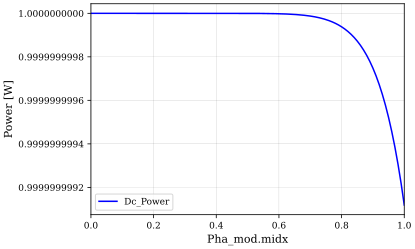

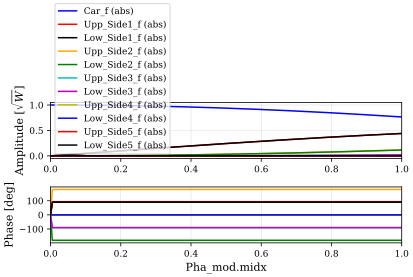

Total Power for midx= 0.0 : 1.0000000000000004
Total Power for midx= 0.005 : 1.0000000000000004
Total Power for midx= 0.01 : 1.0
Total Power for midx= 0.015 : 1.0
Total Power for midx= 0.02 : 1.0000000000000004
Total Power for midx= 0.025 : 1.0000000000000004
Total Power for midx= 0.03 : 1.0000000000000004
Total Power for midx= 0.035 : 1.0000000000000002
Total Power for midx= 0.04 : 1.0000000000000002
Total Power for midx= 0.045 : 1.0
Total Power for midx= 0.05 : 1.0
Total Power for midx= 0.055 : 1.0000000000000002
Total Power for midx= 0.06 : 1.0
Total Power for midx= 0.065 : 1.0
Total Power for midx= 0.07 : 1.0
Total Power for midx= 0.075 : 0.9999999999999999
Total Power for midx= 0.08 : 1.0000000000000002
Total Power for midx= 0.085 : 1.0
Total Power for midx= 0.09 : 1.0
Total Power for midx= 0.095 : 1.0
Total Power for midx= 0.1 : 1.0000000000000004
Total Power for midx= 0.105 : 1.0000000000000004
Total Power for midx= 0.11 : 0.9999999999999999
Total Power for midx= 0.115 : 1.00000

In [2]:
import matplotlib.pyplot as plt
midx=[]
Dc1=[]
car_a1=[]
upp_s_a_1=[]
low_s_a_1=[]
upp_s_a_2=[]
low_s_a_2=[]
upp_s_a_3=[]
low_s_a_3=[]
upp_s_a_4=[]
low_s_a_4=[]
upp_s_a_5=[]
low_s_a_5=[]
for j in range(201):
    P_j=0
#creating a model for phase modulator

model2=finesse.Model()
model2.parse("""
l laser P=1
s space laser.p1 Pha_mod.p1 L=1
mod Pha_mod f=1000 midx=0.3 order=5 mod_type=pm
pd Dc_Power Pha_mod.p2.o
ad Car_f Pha_mod.p2.o f=0
ad Upp_Side1_f Pha_mod.p2.o f=1000
ad Low_Side1_f Pha_mod.p2.o f=-1000
ad Upp_Side2_f Pha_mod.p2.o f=2000
ad Low_Side2_f Pha_mod.p2.o f=-2000
ad Upp_Side3_f Pha_mod.p2.o f=3000
ad Low_Side3_f Pha_mod.p2.o f=-3000
ad Upp_Side4_f Pha_mod.p2.o f=4000
ad Low_Side4_f Pha_mod.p2.o f=-4000
ad Upp_Side5_f Pha_mod.p2.o f=5000
ad Low_Side5_f Pha_mod.p2.o f=-5000
""")
model2.parse("xaxis(Pha_mod.midx,lin,0,1,200)")
out2=model2.run()
out2.plot()
for i in range(201):
    midx.append(0.005*i)
    Dc1.append(out2["Dc_Power"][i])
    car_a1.append(out2["Car_f"][i])
    upp_s_a_1.append(out2["Upp_Side1_f"][i])
    upp_s_a_2.append(out2["Upp_Side2_f"][i])
    upp_s_a_3.append(out2["Upp_Side3_f"][i])
    upp_s_a_4.append(out2["Upp_Side4_f"][i])
    upp_s_a_5.append(out2["Upp_Side5_f"][i])
#Displaying the total power carried by the modulated signal
for i in range(201):
    print("Total Power for midx=",0.005*i,":",abs(car_a1[i])**2+2*(abs(upp_s_a_1[i])**2+abs(upp_s_a_2[i])**2+abs(upp_s_a_3[i])**2+abs(upp_s_a_4[i])**2+abs(upp_s_a_5[i])**2))



We can see that the DC power measured at the EOM, can be reached by summing more sidebands, in the case of a phase modulated signal.

<div style="background-color:#057BA3; padding:6px; color:#ffffff;">

## IUCAA Finesse Workshop 18-22nd Dec 2019
</div>


# Demodulation, locking and control

## Quick Fabry-Perot recap

 - The cavity is maximally resonant for laser frequencies close to an integer multiple of the cavity's free spectral range.
 - A change in the length of the cavity looks the same as a change in laser frequency.
 - The reflectivity of Fabry-Perot cavities depends on the laser frequency (see below).

### Remember: Fabry-Perot cavities are frequency dependent filters

Fabry-Perot cavities have a bandwidth (frequency range) over which they are sensitive, related to the full-width half-maximum (FWHM). That means any modulation of the cavity mirrors or input field at frequencies from 0 to the FWHM are enhanced by the cavity. Frequencies beyond the FWHM are attenuated to greater extent with increasing frequencies.

Recall the equation describing the amplitude of the reflected field of the Fabry-Perot cavity from yesterday:

$$
E_{\text{out}} = E_{\text{in}} \left( r_1 - \frac{t_1^2 r_2 \text{e}^{-2\text{i}kx}}{1 - r_1 r_2 \text{e}^{-2\text{i}kx}} \right)
$$

Recall that $k$ is the wave number $k = \frac{2\pi}{\lambda_0} = \frac{2\pi f}{c_0}$. This shows that Fabry-Perot cavities have **frequency dependent reflectivity**. This applies to both the laser frequency and the modulation frequency, since modulation creates sidebands which look like fields at different laser frequencies. That means you can often treat a Fabry-Perot cavity as a single mirror with complex reflectivity.

## Frequency discrimination

As we mentioned in the earlier section on optical beats, we need some way to control cavities using modulation. Can we use the principle of modulation and the fact that Fabry-Perot cavities have frequency dependent reflectivity to control them?

**Yes**! We can create sidebands on the input laser light at some frequency offset where the sidebands will **not** enter the cavity. Then we can ensure that the light from the sidebands beats with the light reflected from the cavity. The resulting signal will contain information as to what the cavity is doing to the light with respect to its input mirror.

When we beat a field that does not enter a cavity with a field from one that does, and get a signal that tells us how the cavity's frequency is changing with respect to outside, we call it a **frequency discriminant**. As we'll see later, we can use this to control the cavity.

## Controlling cavities with modulation and demodulation

In a nutshell, the process for controlling a cavity is therefore:

 - **Modulate** the carrier field. This can be done by an electro-optic modulator using the Pockels effect, for example.
 - **Detect** the beat signal between the sidebands and the carrier reflected from the cavity using a photodetector.
 - **Demodulate** the signal at the modulation frequency.

### Suitable choice of modulation frequency

The modulation (sideband offset) frequency we choose must fit a few conditions:
 - It should not resonate in the cavity - so it should be far in frequency from an integer multiple of the cavity's free spectral range.
 - It should ideally be in the RF frequency range (around 1 MHz to 1 GHz) for which low cost, low noise electronics exist.
 - It should be low enough in frequency for photodetectors to see it. Practically, this usually means < 100 MHz, limited by stray capacitance in photodiodes.

<div style="background-color:#cceffc;padding:10px;">
    
### Question: Suitable Sideband Frequencies

The sidebands should not enter the cavity. That means the chosen modulation frequency should not be the cavity's free-spectral range (FSR). Why might a phase modulation sideband frequency of 10 MHz be a bad choice for controlling a cavity with FSR 20 MHz?

</div>

The sideband frequency will equal the free spectral range if we offset the carrier field by 10MHz, the sideband frequencies must be far from a FSR, so that it does not resonate in the cavity.

### Demodulation

Demodulation is the technique of extracting the information modulated on the carrier. In laser interferometry, a demodulator is an electronic circuit that is applied after detecting the power of the laser beam. For gravitational wave detectors, it is used to extract information about the gravitational wave signal, extract noise information, and read out information necessary for controlling the interferometer.

Demodulation involves multiplying a field (e.g. the electronic photodetector signal) with a sinusoidal signal (sometimes called a **local oscillator**). The result is a signal containing **DC** components and components at twice the modulation frequency.

Mathematically, the demodulation process is similar to modulation and can be described by a multiplication of the modulated signal with a cosine: $\cos(\omega_x + \phi_x)$, where $\phi_x$ is the demodulation *phase*. Assuming the signal is

$$
\begin{aligned} S_0=|E|^2=E\cdot E^*=\sum \limits _{i=0}^N\sum \limits _{j=0}^N a_ia_j^*~e^{\mathrm {i}\,(\omega _i-\omega _j)\,t}, \end{aligned}
$$

Multiplied with the local oscillator it becomes

$$
\begin{aligned} S_{1} = & {} S_0\cdot \cos (\omega _xt+\varphi _x) \\ = & S_0\frac{1}{2}\left( e^{\mathrm {i}\,(\omega _xt+\varphi _x)} + e^{-\mathrm {i}\,(\omega _xt+\varphi _x)}\right) \nonumber \\= & {} \frac{1}{2}\sum \limits _{i=0}^N\sum \limits _{j=0}^N a_ia_j^*~e^{\mathrm {i}\,(\omega _i-\omega _j)\,t}\cdot \left( e^{\mathrm {i}\,(\omega _xt+\varphi _x)} + e^{-\mathrm {i}\,(\omega _xt+\varphi _x)}\right) . \end{aligned}
$$

If we set $A_{ij}=a_ia_j^*$ and $e^{\mathrm {i}\,\omega _{ij}\,t}=e^{\mathrm {i}\,(\omega _i-\omega _j)\,t}$, we get

$$
\begin{aligned} S_{1}\!=\!\frac{1}{2}\left( \sum \limits _{i=0}^NA_{ii}+\sum \limits _{i=0}^N \sum \limits _{j=i+1}^N (A_{ij}~e^{\mathrm {i}\,\omega _{ij}\,t}\!+\!A_{ij}^*~e^{-\mathrm {i}\,\omega _{ij}\,t})\right) \cdot \left( e^{\mathrm {i}\,(\omega _xt+\varphi _x)}+e^{-\mathrm {i}\,(\omega _xt+\varphi _x)}\right) . \end{aligned}
$$

In practice, demodulation is performed by an electronic mixer and a low-pass filter (to get rid of the component at $2\omega_x$, i.e. twice the demodulation frequency). The DC part of the output signal is proportional to the amplitude of the carrier and the amplitude of the sidebands with frequencies $\omega_0 \pm \omega_x$, where $\omega_0$ is the carrier frequency. Mathematically, this is:

$$
\begin{aligned} S_{\mathrm {1,DC}}= & {} \sum \limits _{ij} \frac{1}{2}(A_{ij}~e^{-\mathrm {i}\,\varphi _x}+A_{ij}^*~e^{\mathrm {i}\,\varphi _x})\quad \mathrm {with}\quad \{i,j~|~i,j\in \{0,\ldots ,N\}~\wedge ~\omega _{ij}=\omega _x\}\nonumber \\= & {} \sum \limits _{ij}{\mathfrak {R}}\left\{ A_{ij}~e^{-\mathrm {i}\,\varphi _x} \right\} . \end{aligned}
$$

#### Aside: demodulation phase

We can set $\phi_x$ by controlling the phase of the local oscillator waveform (e.g. by setting the phase with a signal generator). This leads to two interesting results when $\phi_x = 0$ and $\phi_x = \frac{\pi}{2}$:

$$
\begin{aligned} S_{\mathrm {1,DC,phase}}= & {} \sum \limits _{ij}{\mathfrak {R}}\left\{ A_{ij} \right\} ,\nonumber \\ S_{\mathrm {1,DC,quad}}= & {} \sum \limits _{ij}{\mathfrak {I}}\left\{ {A_{ij}}\right\} . \end{aligned}
$$

These are called **in-phase** and **in-quadrature**, respectively. If we were not to set $\phi_x$, the phase would be whatever the delay caused by cables, electronics etc. between the signal source and the mixer is, and the resulting signal would always be just an amplitude. If we want both the amplitude and phase information from the interferometer, it is useful to demodulate at $\phi_x = 0$ and $\phi_x = \frac{\pi}{2}$ to get both the in-phase and in-quadrature signals, then reconstruct a complex number electronically.

## Pound-Drever-Hall control

As mentioned earlier, the most common modulation-demodulation technique for controlling Fabry-Perot in gravitational wave interferometry is the Pound-Drever-Hall technique, shown below.

![Pound-Drever-Hall control](assets/pdh.gif)

The laser has RF phase modulation sidebands imposed upon it by an electro-optic modulator (EOM) before entering a Fabry-Perot cavity. The cavity reflects the RF sidebands promptly if the RF sideband frequency is suitably chosen to be outside the cavity's FSR (remember: Fabry-Perot cavities are frequency dependent filters), but the carrier enters the cavity and is reflected with a complex frequency dependence. The two fields - the promptly reflected sidebands and the carrier - reflect at the beam splitter to a photodiode where they beat together and form an electrical signal. This electrical signal is demodulated by the same local oscillator that modulated the EOM. The resulting signal is an error signal for the cavity length, with the sign of the signal showing which direction the cavity has moved from its resonance.

We can use this error signal to apply a controlled force with an actuator to move the cavity back on resonance.

### The Pound-Drever-Hall error signal

*The derivation of the Pound-Drever-Hall signal involves a lot of steps, so we do not show it in full here. Instead you can look at <a href="https://dcc.ligo.org/public/0028/T980045/000/T980045-00.pdf">this excellent reference from Eric Black</a>. We show the main results here.*

So far, we have calculated the reflectivity of the Fabry-Perot cavity, and the effect on a laser field from phase modulation, and the result when the reflected carrier is beat with the modulated field. Here we put the whole thing together to derive the error signal that the Pound-Drever-Hall technique provides.

The power on a photodetector seeing the reflected light from a Fabry-Perot cavity, where the input has been phase-modulated, is

$$
\begin{align}
P_\text{ref} =& P_c | F ( 2\pi f) |^2 + P_s (|F(2 \pi (f + f_a))|^2 + |F(2 \pi ( f - f_a))|^2) \\
+& 2 \sqrt{P_c P_s} \mathfrak{R} \left\{ F(2 \pi f) F^* (2 \pi (f + f_a)) - F^*(2 \pi f) F(2 \pi (f - f_a)) \right\} \cos(2 \pi f_a t) \\
+& \mathfrak{I} \left\{ F(2\pi f) F^*(2\pi (f + f_a)) - F^*(2\pi f) F(2\pi (f - f_a)) \right\} \sin(2 \pi f_a t) \\
+& (2 f_a \text{ terms...}).
\end{align}
$$

Here, $P_c$ is the carrier power and $P_s$ is the sideband power of the light incident on the cavity, $F$ is the complex cavity reflectivity from above distilled into a single function (remember that this is a function of $f$, not shown for brevity), and $f_a$ is the signal sideband frequency.

The electronic mixer which demodulates the above signal at the modulation frequency will (nominally) pull out the $\sin(2\pi f_a t)$ term, producing an error signal:

$$
\epsilon = 2 \sqrt{P_c P_s} \mathfrak{I} \left\{ F(2 \pi f_) F^*(2 \pi (f + f_a)) - F^*(2 \pi f) F(2 \pi (f - f_a)) \right\}.
$$

<div style="background-color:#cceffc;padding:10px;">
    
### Question: Transmitted light

Could we use the transmitted light from the cavity for Pound-Drever-Hall control?

</div>

Yes, we can use the transmitted light from the cavity for PDH control. This is possible because, the transmission coefficient of the cavity is also a frequency dependent function.

### Visualisation of Pound-Drever-Hall signal

The Pound-Drever-Hall signal has a very distinctive shape. If we look at the reflected light from a cavity as one of its mirrors is tuned (moved longitudinally), the cavity power and error signal using the Pound-Drever-Hall technique look something like this:

![Pound-Drever-Hall signal](assets/pdh-error-signal.png)

Notice the error signal (lower plot) is **asymmetric** and continuous around 0. If the cavity moves in one direction (or the laser changes frequency), the error signal changes in one direction, and if it moves in the other direction (or the laser changes frequency to the opposite side), the error signal changes in the opposite direction. This is what we want: **a bipolar error signal**.

<div style="background-color:#cceffc;padding:10px;">
    
### Question: Other peaks

There are additional, smaller peaks either side of the central one. What causes these? Why are they smaller?

</div>

The smaller peaks are due to power buildups of sideband fields when they resonate with the cavity's FSR. They are smaller because they carry a modulation depth term with it.

## Linear error signals and control loops

As you can see, the error signal above has a nice linear region close to 0 where the sign tells us which side of the resonance we are on, and hence allow us to determine which sign of actuation to provide to the mirror or laser frequency to bring the cavity back to resonance should it fall away from it.

**What about when the cavity is sitting somewhere far from the linear error signal region, e.g. -15 kHz in the plot above?**

There, the error signal goes close to zero and no longer provides us with useful sign information. In effect, we are back to our starting point before we introduced Pound-Drever-Hall of not knowing which sign with which to provide feedback. **It is therefore important to keep the cavity close to the region close to 0 where the error signal is linear.**

We keep the cavity close to its resonance using **linear negative feedback**. In a nutshell, this is essentially the process of taking our Pound-Drever-Hall error signal, applying some *gain* (amplification), then applying the resulting signal to some actuator which influences the cavity length or the frequency of the laser - as discussed earlier, this can be some coil/magnet actuators, or a piezoelectric transducer or heater on the laser's crystal, or an EOM, for example.

We call this process of feeding back our error signal to hold the cavity on resonance **locking**.

Because the error signal is applied to an actuator which itself influences the error signal, this forms a **control loop**. The analysis of loops is important for understanding the stability and sensitivity of interferometers.

### Linear, time-invariant control

By holding the interferometer close to their resonant points, we are able to assume the system is **linear** and **time-invariant** (LTI). This allows us to assume some simple principles apply in the design of our control system:

 - **The superposition principle** applies: the net response caused by two or more stimuli is the sum of the responses that would have been caused by each stimulus individually.
 - **Frequencies do not mix**: a signal at one frequency has no influence on signals at other frequencies.
 - **Our time-domain signals have Fourier transforms**. This allows us to think about our interferometers, control loops and even gravitational wave signals in the frequency domain, which simplifies the design process.

Time-invariance means that the response of a system to an input does not depend on the time at which that input is applied.

In this case it is common to solve these equations by employing methods based on the Laplace transform. The response of the system is represented by its transfer function which is the Laplace transform of its impulse response - i.e., the output produced in the time domain when the input is a Dirac-delta (infinitely sharp) function.

### Responses

In LTI systems, the "output" for a given "input" is determined by the response function, which can be a function of frequency:

$$
R(f) = \frac{B(f)}{A(f)}
$$

where $A$ is the input and $B$ is the output. The units of the response are whatever the units of $A$ and $B$ are, so for example the response from a mirror being moved to a photodetector's electronic output could be volts-per-meter.

If we know the response function $R$, and we measure $B$, we can infer $A$:

$$
A(f) = \frac{B(f)}{R(f)}
$$

The above equation tells us that if the input to the system is some signal, the output is that signal multiplied by the response of the detector. **This is, in a very simplified way, how we detect gravitational waves!** We take the output signal and we divide by our calibrated interferometer response to project the output into equivalent cavity mirror displacement.

<div style="background-color:#cceffc;padding:10px;">
    
### Question: units

Can a response be dimensionless?

</div>

#### Frequency dependence of responses

Responses are generally frequency-dependent. For instance, the transfer function of a Fabry-Perot cavity from mirror displacement to demodulated error signal is flat up to frequencies close to the cavity's full-width half-maximum. Above this frequency, the transfer function drops following an inverse frequency relationship.

![Fabry-Perot response](assets/fabry-perot-tf.png)

<div style="background-color:#cceffc;padding:10px;">
    
### Hint: estimating frequency dependence on base 10 log-log plots

When a response plotted on a log-log scale such as the above has a region which drops in magnitude as a function of frequency, you can estimate the frequency dependence by "counting decades". In the above plot, the signal drops by one order of magnitude on the y-axis for every order of magnitude on the x-axis. That means the signal is decaying with a $f^{-1}$ relationship. If it were to drop two decades on the y-axis for every decade on the x-axis, it would be dropping by $f^{-2}$. Conversely, if it dropped by only half a decade on the y-axis for one decade on the x-axis, it would be dropping at $f^{-0.5}$.
    
Be careful when the plot is semi-log or linearly scaled, where the above rule is invalid.

</div>

### Calculating the response through multiple components

Due to the properties of LTI systems, we can calculate the response of a complete system by simply multiplying together responses of connected components.

For instance, a photodiode converts light power (watts) into photocurrent (amps). Typically we place a *transimpedance amplifier* directly behind a photodiode to then convert this photocurrent into a voltage (volts). The overall response of the photodetector is therefore the responsivity of the photodiode (amps/watt) multiplied by the transimpedance (volts/amp). The overall response then has units of volts/watt. If you also calibrate your interferometer, you can obtain the response of the mirrors to the detector in meters/watt. Projecting this through your detector gives you the response in volts/meter, and at that point you have a direct means to sense the displacement of your mirrors with a data acqusition system.

#### Aside: open loop gain

If you propagated the response of every component around the **whole** loop, we would end up with a function with the same input and output units. This is a transfer function with a special name: the **open loop gain**. This is important for understanding the suppression effect of control loops and their stability (not covered in this course).

### Visualising control loops

A useful tool for understanding control loops is with **block diagrams**. These involve drawing each macroscopic component of our interferometer and control system as boxes ("blocks"), with one or more inputs and outputs, and creating a loop by connecting these boxes with lines. Each block represents a (potentially frequency dependent) gain applied to its inputs and provided as outputs. The word "plant" from control systems engineering is borrowed here, which usually refers to the interferometer's response. In the case of interferometers, there are multiple inputs and outputs - each cavity mirror has a separate response to the detector for example - so when we write these blocks mathematically, they are usually **matrices**.

![Block diagram example](assets/block-diagram.svg)

In the above diagram, the "Controller" is our feedback system. The "Error point" tells us the error signal, i.e. the error from resonance that the controller must correct. The "Feedback point" is the signal we apply to the interferometer's actuators, e.g. a voice coil. The "Set position" is usually zero, since we want the interferometer to be at resonance with the error signal zero.

### Extra: inferring the motion of the cavity (gravitational wave) from the control loop

You may wonder: as we said in the introduction, we would like to make our interferometers as quiet as possible from all Earth-based disturbances so that we are maximally sensitive to gravitational waves. If we are intentionally applying forces to our mirrors or lasers to keep them resonant, are we not then "removing" our gravitational wave signal from the cavity length? Don't we *want* the cavity's length to change when a gravitational wave passes by?

The answer is perhaps a little tricky to grasp if you have not thought about it before, but it's relatively simple:

The error signal *is* our gravitational wave signal, *even if we're feeding that error signal back to some actuator in the control loop that keeps the cavity length fixed*. This is the "magic" of closed loop control systems and a derivation of this aspect is not covered here, but can be found in introductory control system texts.

A nice way to visualise this is to imagine a perfectly quiet cavity that is sitting at resonance with its feedback loop switched on. If a gravitational wave were to come by and "move" a mirror, the Pound-Drever-Hall error signal would become non-zero and the feedback would apply a corrective force to the mirror. The error signal would then again be zero. If the signal again changed, the error would again go non-zero and again the correction would make it zero. If you imagine this process happening continuously for a prolonged gravitational wave signal, you realise that the cavity length stays fixed and the error signal traces out the signal of interest (the gravitational wave).

<div style="background-color:#057BA3; padding:6px; color:#ffffff;">

## IUCAA Finesse Workshop 18-22nd Dec 2019
</div>

# Locking a Fabry-Perot Cavity

In this notebook, you will learn how modulation and demodulation can be used in Finesse to produce Pound-Drever-Hall error signals and (if there is time) simple active feedback loops within a model.

## Goal of the session
In this notebook, we return to our model of a 2-mirror cavity. We'll first introduce sidebands to the input field, then use these to generate a Pound-Drever-Hall error signal that could be used to lock the laser to the cavity (or vice versa). 

*If there is time*, we'll then take a look at the `lock` command included in Finesse, which can be used to create a simple feedback loop in your simulations.

**Finesse/Pykat things you will learn**:

 - constructing an error signal using the `mod` and `pd1` components
 - manipulating an existing `kat` object using PyKat commands like `kat.[component].remove()`
 - how using Finesse/PyKat can help you design a control scheme 
 - (maybe) the `lock` command, it's uses and it's limitations

## Getting Started

As usual, we start by loading PyKat and the other Python packages we will need. This time, we *also* load the code for a simple 2-mirror cavity, as used in our earlier notebook:

<img src=http://www.gwoptics.org/learn/02_Plane_waves/01_Fabry_Perot_cavity/fabry-perot.svg width=40%>

<font size=1 color='Grey'>image: GWOptics</font>

For the tasks below, you should create a copy of this optical model using `kat = basekat.deepcopy`.

(type shift+enter to run)

In [ ]:
from pykat import finesse        # import the whole pykat.finesse package
from pykat.commands import *     # import all packages in pykat.commands
import numpy as np               # for basic math/sci/array functions
import matplotlib.pyplot as plt  # for plotting

# tell the notebook to automatically show plots inline below each cell
%matplotlib inline               
# use pykat's plotting style. change dpi to change plot sizes on your screen
pykat.init_pykat_plotting(dpi=90)

#initialise Finesse with a new empty kat object
basekat = finesse.kat() 
#tell Finesse to talk less
basekat.verbose = False
#parse the Finesse code into PyKat
basekat.parse("""
l laser 1 0 n0
s s0 0.1 n0 n1

#the cavity:
m1 M1 0.15 0 0 n1 n2
s scav 0.2 n2 n3
m1 M2 0.15 0 0 n3 n4
""")

## Error signals, modulation and demodulation

In a Finesse simulation, a cavity will sit perfectly on resonance unless we deliberately alter some parameter that changes the resonant condition of the system. In reality, external disturbances such as seismic noise, temperature changes, or drifts in the input laser frequency will affect the system. The optical system must be actively controlled so that the cavity length and laser frequency are *locked* such that one follows the other, and the cavity stays resonant. 

To do this, we require an error signal that can be used in a feedback loop. 

As you have seen, one method to do this is to modulate the input field, producing <a href=https://en.wikipedia.org/wiki/Sideband>sidebands</a> which interact with the cavity differently to the main 'carrier' field. The beat signal produced between these sidebands and the carrier, after interacting with the cavity, depends on the resonant condition in the cavity for all of the fields involved.

As you have seen, the 'standard' method for locking a laser to a two mirror cavity is the <a href=https://en.wikipedia.org/wiki/Pound–Drever–Hall_technique>Pound-Drever-Hall (PDH)</a> technique, depicted below. In this case, the input beam is phase modulated to produce a pair of sidebands which do not resonate in the cavity, so are just directly reflected. A photodiode on reflection then measures the beat signal, which is demodulated and low-passed to produce an antisymmetric DC error signal that is linear over the bandwidth of the cavity. This error signal can be fed back to a component that can change the phase of the light, e.g. the laser.

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/6/6c/Pound–Drever–Hall_technique.svg/400px-Pound–Drever–Hall_technique.svg.png width='40%' height='40%'>
<img src=https://www.newport.com/medias/sys_master/images/images/h59/h68/8797626368030/App-note-15-Fig3-600w.gif width=30% height=30%>
<font size=1 color='Grey'>images: Wikipedia, Newport Optics</font>

You can learn more about modulation and demodulation in <a href=https://link.springer.com/article/10.1007%2Fs41114-016-0002-8#Sec16>chapter 3</a> of Interferometer Techniques, or by exploring <a href=http://www.gwoptics.org/learn/02_Plane_waves/03_Optical_modulation/index.html> Sections 2.3 and 2.4</a> of the GWOptics "Learn Interferometry" course.

**In Finesse** the full PDH technique is replicated using two components: (1) a modulator (`mod`), which can be configured to act like a EOM, EOAM, produce a single sideband, etc; and (2) a demodulating photodiode (`pd[n]`), where `n` specifies the number of demodulations required (1, in our case). The `pd1` combines the roles of the photodiode, mixer, and low-pass filter in a physical setup, directly recording the resulting error signal. 


<div style="background-color:#cceffc;padding:10px;">

### Task 1: Plot the PDH error signal for the cavity

1. Create a deep copy of the `basekat` object to load the simple cavity model.


2. Remove the existing space between the laser and cavity, `s0`, by using the pykat command `kat.s0.remove()`. 
    (You can check this has worked using `print(kat)` to see the current kat object).


3. In the gap that now exists between the laser and the cavity, parse the Finesse commands for a space, followed by a *phase* modulator with modulation depth 0.3 and frequency 80MHz, followed by a second space. Ensure that the nodal network is fully reconnected after this replacement.


4. Parse the code for a photodiode with one demodulation at the modulator frequency, looking on reflection from the cavity.


5. Plot the photodiode output as a function of the tuning of mirror M2 in the range -50 to +50 degrees.


6. How does the error signal change with demodulation phase? What is the optimal phase in this case? What other parameters affect the size and shape of the error signal? Why?

**Hint:** you might like to check the <a href=http://www.gwoptics.org/finesse/reference/>Finesse syntax reference</a>.

**Hint:** in Finesse, large numbers can be input using the metric prefixes, so e.g. an EOM frequency of 1kHz can be specified as `1k`. 
 </div>

In [3]:
import finesse
finesse.configure(plotting=True)
model=finesse.Model()
model.parse("""
l laser P=1 f=0 
s space laser.p1 Pha_mod.p1
mod Pha_mod f=80M midx=0.3 order=1 mod_type=pm
s space2 Pha_mod.p2 mirror1.p1
m mirror1 R=0.85 T=0.15 
s cavity mirror1.p2 mirror2.p1 L=0.2
m mirror2 R=0.85 T=0.15
""")


In [4]:
for i in range(0,6):
    model.parse(f"pd1 pdh{18*i:.0f} mirror1.p1.o f=80M phase={i*18:.0f}")
# for i in range(0,6):
#     model.remove(f"pdh{i:.0f}{ 18*i:.0f}")

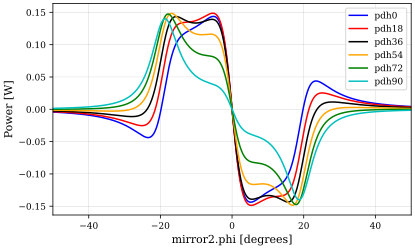

{finesse.detectors.powerdetector.PowerDetectorDemod1: <Figure size 576x355.968 with 1 Axes>,
 'pdh0': <Figure size 576x355.968 with 1 Axes>,
 'pdh18': <Figure size 576x355.968 with 1 Axes>,
 'pdh36': <Figure size 576x355.968 with 1 Axes>,
 'pdh54': <Figure size 576x355.968 with 1 Axes>,
 'pdh72': <Figure size 576x355.968 with 1 Axes>,
 'pdh90': <Figure size 576x355.968 with 1 Axes>}

In [5]:
model.parse("xaxis(mirror2.phi,lin,-50,50,1000)")
out=model.run()
out.plot()

The pdh18 performs better for it has a longer linear region about the zero error point and has a much steeper slope.

## Feedback and locks

As stated above, in a simple Finesse simulation we don't need to include a feedback loop in our model to ensure a cavity is resonant: if we set the microscopic tunings of both mirrors to 0 degrees, the cavity is by default *defined* to be resonant. 

However, there are many cases where we still might need to include active feedback loops in our models. Typically this applies when we need to scan a parameter in the model which also happens to affect the cavity resonance condition.

A simple example of this is to imagine that for some external reason, the tuning of one of the mirrors is non-zero. To make sure the cavity is resonant for any tuning of this mirror, we use a feedback loop to 'lock' either the frequency of the laser, or the tuning of the other mirror, to the cavity resonance.

<div style="background-color:#cceffc;padding:10px;">

###  Task 2: Plot the circulating power and PDH error signal for multiple M1 tunings

1. Create a copy of the modified model you used in Task 1. Add a photodiode to monitor the power circulating in the cavity. Plot the circulating power and error signal (using the optimal demodulation phase) on separate axes, as functions of the microscopic tuning of M2.


2. Set the tuning of M1 to a small non-zero value. Plot the results on the same axes as step 1. How can we use this information to send a signal to M1 that will put the cavity back on resonance?
 </div>

In [6]:
import finesse
finesse.configure(plotting=True)
model2=finesse.Model()
model2.parse("""
l laser P=1 f=0 
s space laser.p1 Pha_mod.p1
mod Pha_mod f=80M midx=0.3 order=1 mod_type=pm
s space2 Pha_mod.p2 mirror1.p1
m mirror1 R=0.85 T=0.15 
s cavity mirror1.p2 mirror2.p1 L=0.2
m mirror2 R=0.85 T=0.15
""")


In [7]:
model2.parse("""
pd CirculatingPower mirror2.p1.i
pd1 Error mirror1.p1.o 80M 18
""")


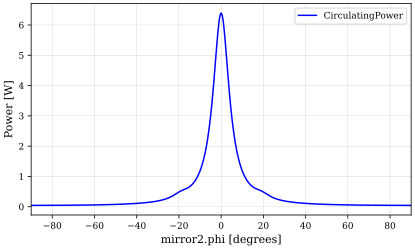

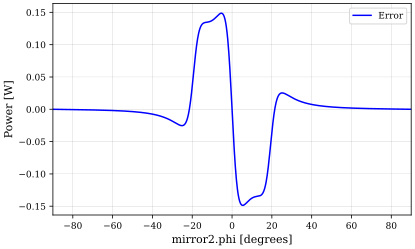

{finesse.detectors.powerdetector.PowerDetector: <Figure size 576x355.968 with 1 Axes>,
 'CirculatingPower': <Figure size 576x355.968 with 1 Axes>,
 finesse.detectors.powerdetector.PowerDetectorDemod1: <Figure size 576x355.968 with 1 Axes>,
 'Error': <Figure size 576x355.968 with 1 Axes>}

In [8]:
model2.parse("xaxis(mirror2.phi,lin,-90,90,1000)")
out=model2.run()
out.plot()

It is evident from the figure that the circulating power reaches the maximum when the error signal approaches zero.<br>
We will now perturb the resonance by tuning the mirror1 by $10^{o}$.

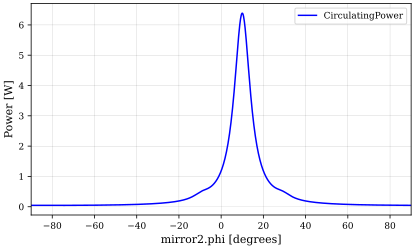

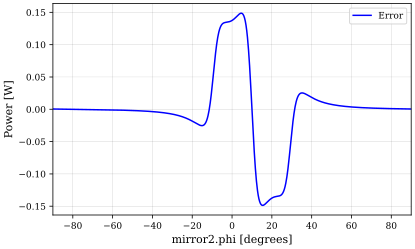

{finesse.detectors.powerdetector.PowerDetector: <Figure size 576x355.968 with 1 Axes>,
 'CirculatingPower': <Figure size 576x355.968 with 1 Axes>,
 finesse.detectors.powerdetector.PowerDetectorDemod1: <Figure size 576x355.968 with 1 Axes>,
 'Error': <Figure size 576x355.968 with 1 Axes>}

In [9]:
model2.mirror1.phi=10
out=model2.run()
out.plot()

Resonance is effected only by the length of the cavity.<br>
When we tune the mirror1 by $10^{o}$, the corresponding plots are also shifted across the xaxis by $10^{o}$.The maximum circulation power and the minimum error occurs at a tuning of $10^{o}$ of the second mirror. <br>
The plots tell us to that the resonance is missed by the length corrseponding to a tuning of $10^{o}$ and the second mirror has to be moved in the forward direction to lock the cavity back to resonance.

### The `lock` command in Finesse

Finesse includes a command called `lock` which can be used to create a feedback loop that reads an error signal, applies some gain, and sets the value of a parameter in the model so that the error signal value reaches a target value and accuracy. 

This is *not* a true control loop. It doesn't actively and dynamically respond to the system using any kind of transfer function with electronic filters etc. It just tries to mimic a simple integrator by performing the following steps:

For each step of the x-axis command:
1. read the value of the associated variable. This acts as the error signal. It's usually a (demodulated) photodiode, turned into a variable directly using `set` or via some additional mathematics using `func`. 
2. write this value to the new output with your choice of name. 
3. update the value of the output to `new_val = old_val + gain * variable`, and apply this to the specified optic parameter
4. calculate the interferometer matrix and read the resulting value of the variable.
5. if `|variable|>accuracy`, iterate steps 3 & 4 until `|variable|<=accuracy`
6. store all the interferometer outputs in `out`. 
7. move to the next x-axis step and repeat 1-6.

Obviously it will fail if:
 - the loop is not closed,
 - the error signal is not good,
 - the computation is not started at or close to a good operating point,
 - the gain is wrong (sign, amplitude) or,
 - the steps as given by the xaxis command are too large (i.e. moves the interferometer out of the linear range of the error signal).
 
Since the `lock` command requires that we start at a good operating point - i.e. that the cavity is on resonance - the xaxis should always start at the operating point then move away from it. If we want to explore effects on both sides of the operating point, this must be done with two separate simulations: one to increase the parameter's value, another that decreases it.

The `lock` command can make simulations much slower, since an iterative process is applied at every value of the xaxis. It is therefore important to consider whether a `lock` is always necessary in your simulation, and if it is, how we can optimise its efficiency. The gain and accuracy settings can help with this, but learning to set good values for these requires some background knowledge about feedback loops and control systems that we won't have time to cover. If you are interested, you can find out more in section 3.5 of the <a href='http://www.gwoptics.org/finesse/download/manual.pdf'>Finesse manual</a>.

#### basic syntax:

E.g. for a simple cavity with a PDH error signal on reflection called `pdh` and mirrors `m1` and `m2`:
```
set err pdh re 
lock z $err -10 10n 
put* m1 phi $z
```

 * `set` defines a variable called `err` which will be used in the iterative loop
 * `lock` defines the gain and accuracy used in each integrator-like iteration and outputs the value to be applied as feedback.
 * `put*` applies the output of the loop *as a delta* to the *current* tuning of `m1`.
 
Use the <a href="http://www.gwoptics.org/finesse/reference/">syntax reference</a> to understand each part of these commands.
 
You might also see something like:
```
set err pdh re 
func newerr = $err + 1E-1
lock z $newerr -10 10n
put* m1 phi $z
```

`func` applies additional maths to the variable before it is used in the integrator-like iterating loop. It can be quite temperamental, so see the syntax reference for guidance if you need to use this.


<div style="background-color:#cceffc;padding:10px;">

###  Task 3: set up a FP cavity that is locked so that the input mirror follows the end mirror

1. Make a copy of the `kat` object you used in Task 2 part 1. Parse a new xaxis which scans the tuning of M2 from 0 to +100 degrees. (This will overwrite the previous `xaxis` command).


2. Using the syntax above, add appropriate `set`, `lock` and `put*` commands so that the tuning of M1 is locked using the `PDH` error signal. You should use an accuracy of 10nW and gain of 1. Plot all of the outputs together using `out.plot()`. 


3. Explore the parameters of the commands we have added. What happens if the accuracy is much higher/lower? If you use too many/too few steps? If the gain is bigger/smaller/negative?

    **Hint:** Try setting `kat.verbose=True`. When there is a `lock` in the model, it will give you some useful feedback about how the iterative process is progressing.
 </div>

In [10]:
model2.parse("""
lock lockedPdh Error mirror1.phi 1 10n
xaxis(mirror2.phi,lin,0,100,100,pre_step=run_locks())
""")

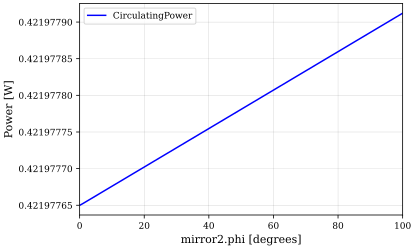

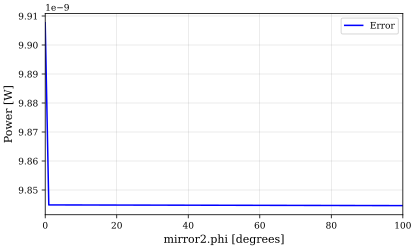

{finesse.detectors.powerdetector.PowerDetector: <Figure size 576x355.968 with 1 Axes>,
 'CirculatingPower': <Figure size 576x355.968 with 1 Axes>,
 finesse.detectors.powerdetector.PowerDetectorDemod1: <Figure size 576x355.968 with 1 Axes>,
 'Error': <Figure size 576x355.968 with 1 Axes>}

In [11]:
out=model2.run()
out.plot()

The error for a tuning mirror1 by $10^{o}$ is positive in between $0^{o}-10^{o}$ of the tuning of mirror2.<br>
The above plots depict the same, If we use a gain of 1 for a postive error the circulating power will drop heavily and start increasing gradually with tuning of mirror2. <br>
If we use a gain of -1 for a positive error, the error is minimised between $0^{o}-10^{o}$ of mirror2.phi and the circulating power remains nearly the same.$10^{o}$

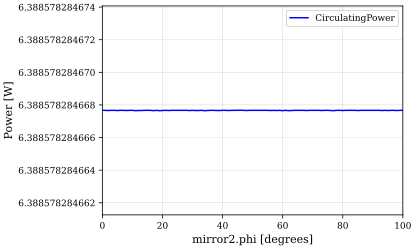

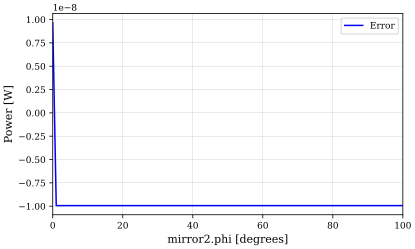

{finesse.detectors.powerdetector.PowerDetector: <Figure size 576x355.968 with 1 Axes>,
 'CirculatingPower': <Figure size 576x355.968 with 1 Axes>,
 finesse.detectors.powerdetector.PowerDetectorDemod1: <Figure size 576x355.968 with 1 Axes>,
 'Error': <Figure size 576x355.968 with 1 Axes>}

In [12]:
model2.lockedPdh.gain=-1
out=model2.run()
out.plot()

As expected, the circulating power reaches nearly the maximum power, i.e, the power at resonance.

#### Things to remember about `lock`s in Finesse:
1. the `lock` command isn't a true feedback loop, but an iterative flat integrator computed at each discrete xaxis step.
1. the `lock` and `func` commands are a bit finniky to set up and take a lot of manual tuning to absolutely optimise. They break easily if something is set wrong
2. the `lock` command means that a multi-step iteration of the whole interferometer calculation for every x-axis value. I.e., it's **slow**, especially if not perfectly optimised.